In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load your dataset
df = pd.read_csv('new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv')

# Define X (features) and y (target)
X = df[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]
y = df['log_k']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Autoencoder architecture
input_dim = X_train.shape[1]  # Number of features in the dataset
encoding_dim = 7  # Number of important features to extract

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Extract the encoder model to get latent features
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Get the latent features for the training and test sets
X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)

Epoch 1/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.6856 - val_loss: 0.5375
Epoch 2/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5391 - val_loss: 0.5373
Epoch 3/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5388 - val_loss: 0.5372
Epoch 4/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.5381 - val_loss: 0.5372
Epoch 5/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5400 - val_loss: 0.5372
Epoch 6/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5385 - val_loss: 0.5371
Epoch 7/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5393 - val_loss: 0.5371
Epoch 8/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.5381 - val_loss: 0.5371
Epoch 9/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5390 - val_loss: 0.5371
Epoch 10/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5396 - val_loss: 0.5370
Epoch 11/100
9841/9841 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.5392 - val_loss: 0.5370
Epoch 12

In [16]:
# Now use the encoded (latent) features for the regression task
from sklearn.linear_model import LinearRegression

# Train a regression model on the latent features
regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

# Predict using the latent features
y_pred = regressor.predict(X_test_encoded)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Mean Squared Error: 0.002351290173033321

Mean Squared Error: 0.0007805497517383263


In [17]:
# Retrieve the coefficients of the linear regression model
coefficients = regressor.coef_

# Display the coefficients for the latent features
print("Coefficients of the latent features: ", coefficients)

#Higher absolute values of coefficients indicate more influence.
#The sign of the coefficient indicates the direction of the relationship (positive or negative).

Coefficients of the latent features:  [ 0.00858368 -0.06512839  0.03949165  0.07244322 -0.01024738 -0.0270594
 -0.00589347]


In [18]:
# Get the encoder weights
encoder_weights = encoder_model.get_weights()

# Weights of the encoder layer (from original features to latent features)'

#Weights of the Encoder: The encoder’s weights define how the original features are transformed into latent features.
#By examining the magnitude of these weights, you can infer which original features contributed the most to each latent feature.
#The encoder_weights[0] matrix represents the contribution of each original feature to the latent space.

print("Encoder weights: ", encoder_weights[0])


Encoder weights:  [[-0.5817764  -0.8967643   0.20968108 -0.94815326 -1.6291665  -0.39756233
  -0.98980474]
 [-1.0400233  -0.8144707  -1.3388848  -0.1539172  -0.12173234  0.01847451
  -0.5420078 ]
 [ 1.7038957  -0.06812024 -0.85886776  0.1272974  -0.13803181  0.03513151
  -0.15859519]
 [-0.16369638 -0.3210096  -0.20201592 -0.11168557 -0.53567016 -0.02863138
   1.4328221 ]
 [-1.6086377   0.15882663 -1.1616465  -0.8115389  -0.8934113  -1.8847886
  -1.1139048 ]
 [-0.6748133   0.19210084 -0.55101115  1.810762   -0.4506369  -0.63532096
  -0.10130797]
 [ 0.8694369   2.320301    0.13834439  1.2786503   0.7309017   2.300307
   0.86302865]]


In [12]:
print("Encoder weights: ", encoder_weights[0][0:5])

Encoder weights:  [[ 0.3767208  -1.6258203  -1.5925637  -0.05484574  0.27981645]
 [-1.9746959  -0.09757718  0.22758585  1.0737941  -1.6255498 ]
 [-0.04526997  0.16936243  2.1373448  -0.06181619  0.22097263]
 [-0.5159119  -0.7188074  -0.46892452 -2.3728087  -1.4690464 ]
 [ 0.7011992  -0.19545545 -0.42910865 -1.0781813   1.1852709 ]]


Encoder weights shape:  (7, 7)


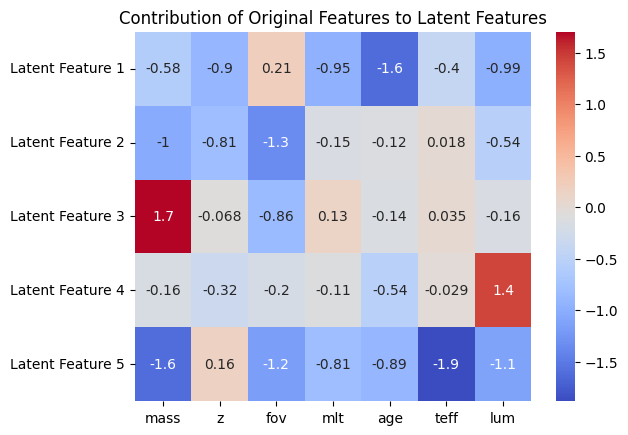

In [19]:
# Extract the weights from the encoder
encoder_weights = encoder_model.get_weights()

# encoder_weights[0] contains the matrix of weights from original features to latent space
print("Encoder weights shape: ", encoder_weights[0].shape)

# Visualize the weights as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(encoder_weights[0][0:5], annot=True, cmap='coolwarm', xticklabels=X.columns, yticklabels=['Latent Feature 1', 'Latent Feature 2', 'Latent Feature 3', 'Latent Feature 4', 'Latent Feature 5'])
plt.title('Contribution of Original Features to Latent Features')
plt.show()

## PCA

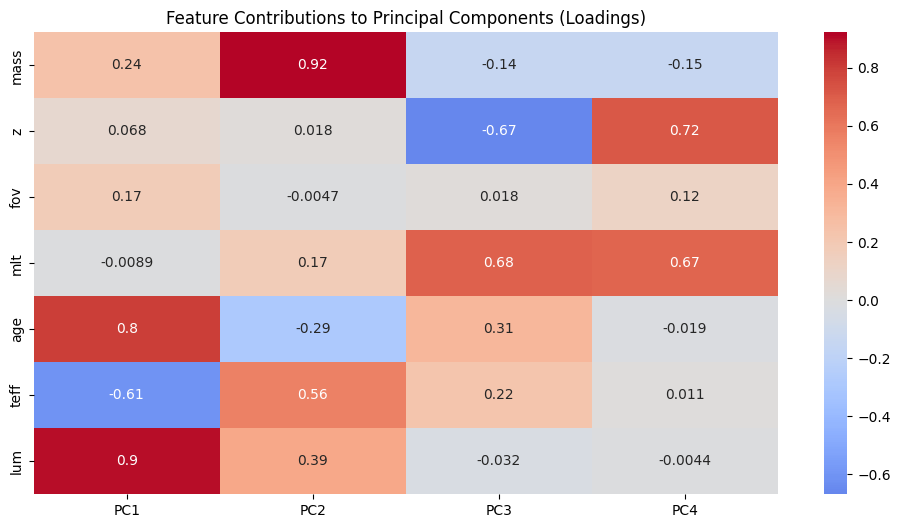

           PC1       PC2       PC3       PC4
mass  0.241660  0.921711 -0.144292 -0.151518
z     0.067708  0.018315 -0.668569  0.715733
fov   0.171028 -0.004715  0.018348  0.118975
mlt  -0.008867  0.174987  0.684338  0.669056
age   0.803301 -0.286634  0.307575 -0.019454
teff -0.605759  0.563776  0.223647  0.010967
lum   0.899428  0.389296 -0.031722 -0.004436


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv('new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv')
X = df[['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']]

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA, retain enough components to explain 95% variance
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Get the PCA components and feature contributions (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Step 6: Create a DataFrame for loadings
loading_df = pd.DataFrame(loadings, index=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Step 7: Visualize the feature contributions to the first few principal components
plt.figure(figsize=(12, 6))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to Principal Components (Loadings)")
plt.show()

# Step 8: Check the magnitude of the loadings
print(loading_df)

In [2]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for the regression model
result = permutation_importance(regressor, X_test_encoded, y_test, n_repeats=10, random_state=42)

# Display feature importances (latent features)

#Permutation importance is a model-agnostic technique to evaluate the importance of each feature by shuffling its values and observing how much the model's performance degrades.
#This can be applied directly to the latent features or the original features.
print("Permutation importance of latent features: ", result.importances_mean)

NameError: name 'regressor' is not defined